In [38]:
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [23]:
housing = pd.read_csv('datasets/housing.csv', usecols=['Longitude', 'Latitude', 'MedHouseVal'])

In [24]:
housing.shape

(20640, 3)

In [25]:
housing.head()

,Latitude,Longitude,MedHouseVal
0,37.88,-122.23,4.526
1,37.86,-122.22,3.585
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

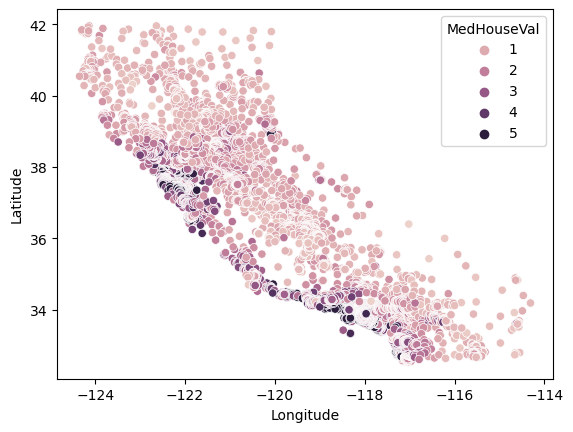

In [26]:
import seaborn as sns

sns.scatterplot(x='Longitude', y='Latitude', data=housing, hue='MedHouseVal')

In [27]:
# Chequear si hay algun valor nulo

housing.isnull().sum()

Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [43]:
SSE = []
for cluster in range(2, 15):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(housing)
    SSE.append(kmeans.inertia_)

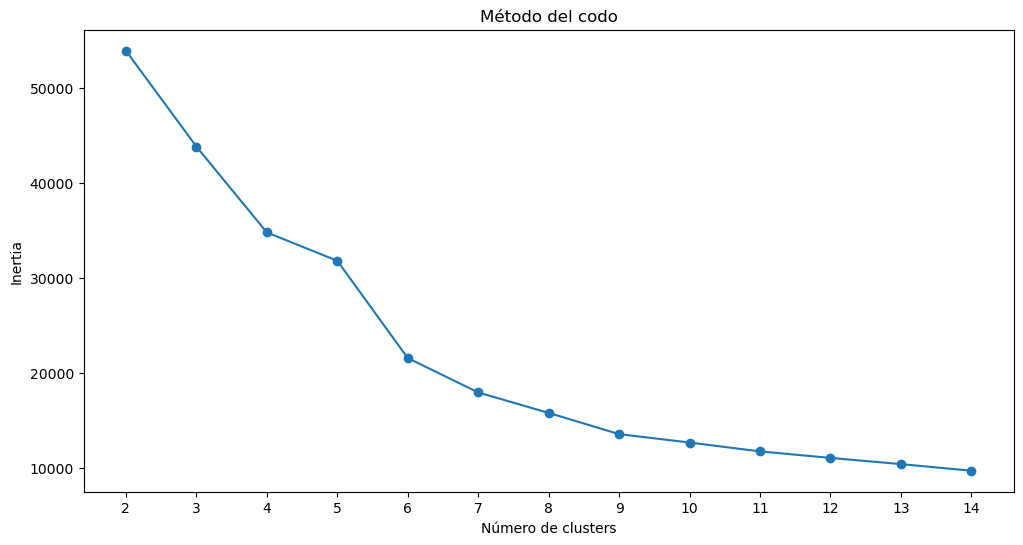

In [44]:
frame = pd.DataFrame({'Cluster': range(2, 15), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Número de clusters')
plt.xticks(range(2, 15))
plt.ylabel('Inertia')
plt.title('Método del codo')
plt.show()

In [55]:
housing_kmeans = KMeans(n_clusters=2, random_state=1, n_init='auto')
housing_kmeans.fit(housing)

KMeans(n_clusters=2, random_state=1)

In [58]:
housing_spectral = SpectralClustering(n_clusters=2, random_state=1)
housing_spectral.fit(housing)

<Axes: xlabel='Longitude', ylabel='Latitude'>

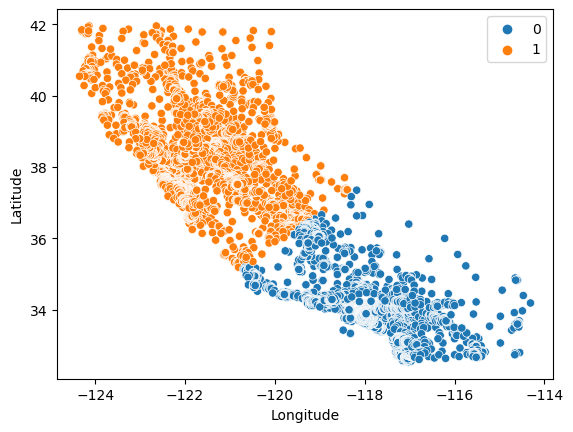

In [56]:
sns.scatterplot(data=housing, x='Longitude', y='Latitude', hue=housing_kmeans.labels_)

In [57]:
housing_kmeans_silhouette_score = silhouette_score(housing, housing_kmeans.labels_, metric='euclidean', random_state=1)
housing_kmeans_silhouette_score

0.6449345469628364